## keras의 pretrained model 활용
- https://keras.io/api/applications/
- https://sike6054.github.io/blog/paper/fifth-post/

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets

In [2]:
mnist = datasets.mnist
(train_x, train_y), (test_x,test_y) = mnist.load_data()

In [3]:
from tensorflow.keras.applications.xception import Xception

In [4]:
model_xception= Xception(weights='imagenet',include_top=False, input_shape=(100,100,3))


83689472/83683744 [==============================] - 9s 0us/step


In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

last = Dense(10, activation='softmax')(gap)
model_xception= Model(model_xception.input,last)

In [15]:
model_xception.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 49, 49, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 49, 49, 32)   0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [16]:
train_x[0].shape

(28, 28)

- 크기 (28,28) -->(299,299) : resize()
- 채널 (1) --> (3) : RGB 각각의 grayscale 값을 똑같이 줌 :merge() <-> split

In [17]:
import cv2

In [18]:
src = train_x[0]
dst = cv2.resize(src, dsize= (299,299), interpolation=cv2.INTER_LINEAR)

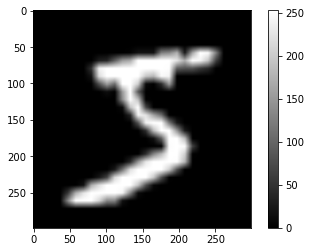

In [19]:
plt.imshow(dst, 'gray')
plt.colorbar()
plt.show()

In [20]:
src.shape, dst.shape

((28, 28), (299, 299))

In [21]:
train_x.shape

(60000, 28, 28)

In [22]:
r= dst
g= dst
b= dst
inversebgr= cv2.merge((r,g,b))

In [23]:
inversebgr.shape

(299, 299, 3)

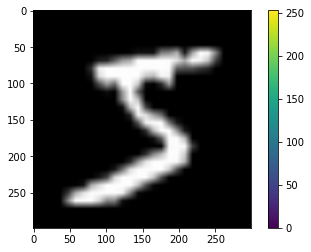

In [24]:
plt.imshow(inversebgr)
plt.colorbar()
plt.show()

In [25]:
img=dst
#dst_size=299
dst_size=100
def myresize(input_imgs, dst_size):
    out_imgs=[]
    for img in train_x:
        img_out=cv2.resize(img, dsize=(dst_size, dst_size), interpolation=cv2.INTER_LINEAR)
        img_out = cv2.merge((img_out, img_out, img_out)) #list tuple 상관없음
        out_imgs.append(img_out)
    return np.array(out_imgs)

a=[]
a.append(np.arange(2))
a.append(np.arange(2))

a

a= np.array(a)

a

In [26]:
train_x_299 = myresize(train_x, dst_size)
train_x_299.shape, train_x.shape

((60000, 100, 100, 3), (60000, 28, 28))

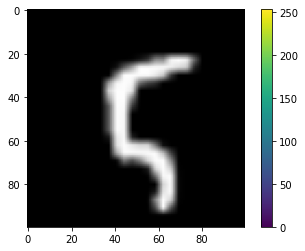

In [28]:
plt.imshow(train_x_299[100])
plt.colorbar()
plt.show()

In [29]:
model_xception.compile(optimizer=tf.keras.optimizers.Adam(),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [30]:
num_epochs=1
batch_size=32
hist=model_xception.fit(train_x_299, train_y, batch_size=batch_size, shuffle=True, epochs=num_epochs)

  34/1875 [..............................] - ETA: 3:45:21 - loss: 0.7297 - accuracy: 0.8097

KeyboardInterrupt: 

In [ ]:
tet_x_299 = myresize(test_x)
test_x_299.shape

- label = ground-truth = 정답 예) train_y, test_y

In [ ]:
results= model_xception.evaluate(test_x_299,test_y)

In [ ]:
test_x_299[index].shape

In [ ]:
index=10
output = model.xception.predict(test_x_299[index].reshape(1,299,299,3))
output

In [ ]:
np.argmax(output), test_y[index]

In [ ]:
plt.imshow(test_x_299[index])
plt.colorbar()
plt.show()

### pretrained model의 일부를 가져와서 사용하기 & 나의 네트워크 추가하기

In [ ]:
model_xception.summary()

In [ ]:
out= model_xception.get_layer('block12_sepconv3_act')

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model_new = Model(model_xception.input, out.output)

In [ ]:
model_new.summary()

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [ ]:
gap= GlobalAveragePooling2D()(out.output)
last = Dense(10, activation='softmax')(gap)
model_new= Model(model_xception.input,last)

In [ ]:
model_new.summary()

In [ ]:
model_new.compile(optimizer=tf.keras.optimizers.Adam(),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [ ]:
num_epochs=1
batch_size=32
hist=model_new.fit(train_x_299, train_y, batch_size=batch_size, shuffle=True, epochs=num_epochs)

In [ ]:
results = model_new.evaluate(test_x_299, test_y)

In [ ]:
index=1000
pred = model_new.predict(test_x_299[index].reshape(1,299,299,3))
pred

In [ ]:
np.argmax(pred), test_y[index]

In [ ]:
plt.imshow(test_x_299[index])
plt.colorbar()
plt.show()

## Model 저장 및 불러오기

In [ ]:
save_path = 'model_new.h5'
model_new.save(save_path, include_optimizer=True)

In [ ]:
model_new_read = tf.keras.models.load_model(save_path)

In [ ]:
result = model_new_read.predict(test_x_299[index].reshape(1,299,299,3))
result